<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 4: Machine Learning - Redes Neuronales</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de Redes Neuronales para la construcción de un modelo de clasificación.

___

## Bibliografía Básica
- Machine Learning. Tom Mitchell. MacGraw-Hill, 1997

___

Implementar redes neuronales para reconocimiento de dígitos escritos a mano, del 0 hasta el 9.

Dispones de 5000 ejemplos de dígitos escritos a mano en $ex4data1.mat$. La extensión. mat indica que contiene datos salvados en formato matriz Octave/Matlab nativo en vez de en formato texto. Después de cargar los datos tendrás en memoria las matrices con las dimensiones y los valores correctos.

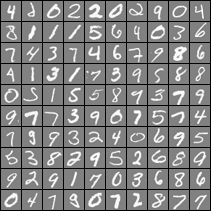

Cada ejemplo de entrenamiento es una matriz de píxeles de 20x20 que constituye un dígito en una escala de grises. Un píxel se representa por un número decimal que indica la intensidad de gris en una posición determinada. Por tanto, la dimensión de X será de 5000x400, donde cada fila es un ejemplo de entrenamiento de una imagen con un dígito escrito a mano. El vector y contiene las etiquetas del conjunto de entrenamiento, de manera que los dígitos del 1 al 9 están etiquetados con su propio dígito, mientras que el 0 se etiqueta con el 10. En la figura puedes ver una muestra de los datos.

Utiliza este notebook para ir incorporando el código y las llamadas a las funciones que se piden en los siguientes ejercicios. Ya están escritas las instrucciones para cargar los datos de entrenamiento y también para recuperar los parámetros theta de una red ya entrenada (ex4weights.mat), comprobar las dimensiones de las distintas matrices. Se usarán 25 neuronas en la capa oculta.

In [1]:
#Librerías necesarias

import math as mt
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Parametrización que se utilizará en este ejercicio

input_layer_size = 400 # 20x20 entrada de las imágenes
hidden_layer_size = 25 # 25 unidades ocultas
num_labels = 10 # 10 etiquetas, desde 1 a 10 (el valor "0" se ha asignado a la etiqueta 10)

In [3]:
# Carga de datos

data = sio.loadmat("ex4data1.mat") # tipo dict
X = data['X']
y = data['y']
m = X.shape[0]

print(m)
print(type(X), type(y))
display(X)
display(y)

5000
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [4]:
# Cargar los pesos de la red

weights = sio.loadmat("ex4weights.mat")
theta1 = weights['Theta1']
theta2 = weights['Theta2']

nn_params_ini = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F'))) # Unroll
print("Shapes: \n\tX: ", X.shape, "\n\ty: ", y.shape, "\n\ttheta1: ", theta1.shape, "\n\ttheta2: ", theta2.shape, "\n\tparams_ini: ", nn_params_ini.shape)

Shapes: 
	X:  (5000, 400) 
	y:  (5000, 1) 
	theta1:  (25, 401) 
	theta2:  (10, 26) 
	params_ini:  (10285,)


## Ejercicios
#### EJ01. 
Implementa la función de coste para una red neuronal nnCostFunctionSinReg. En este ejercicio sólo se pide el coste según:

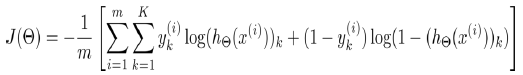

es decir, sin regularizar. La llamada a esta función utilizando los parámetros suministrados Theta1 y Theta2 debe devolver un coste de 0.28763.

##### Solución:

In [5]:
# Funciones
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def nnCostFunctionSinReg(nn_params_ini, input_layer_size, hidden_layer_size, num_labels, X, y):

    
    theta1 = np.reshape(a = nn_params_ini[:hidden_layer_size*(input_layer_size+1)],
                       newshape = (hidden_layer_size, input_layer_size+1),
                       order="F")
    theta2 = np.reshape(a = nn_params_ini[hidden_layer_size*(input_layer_size+1):],
                       newshape = (num_labels, hidden_layer_size+1), order="F")

    m = len(y)
    suma = 0
    y_d = pd.get_dummies(y.flatten())

    for i in range(X.shape[0]):
        a1, a2, h = forward(theta1, theta2, X, i)
        suma += np.sum(y_d.iloc[i] + np.log(h) + (1 - y_d.iloc[i]) * np.log(1 - h), axis = 0) # La funcion de coste
    return suma/(-m)
    
def forward(theta1, theta2, X, i):
    a1 = np.hstack((1, X[i])) # ones = np.ones(1) + a1 PARA METER EL BIAS
    a2 = sigmoid(np.dot(theta1, a1)) # activacion de la primera capa
    a2 = np.hstack((1, X[i])) # Bias de la otra capa
    h = sigmoid(np.dot(theta2, a2)) # activacion 
    return a1, a2, h

In [6]:
# To the neural network, you should first start by implementing the
# feedforward part of the neural network that returns the cost only. You
# should complete the code in nnCostFunction.m to return cost. After
# implementing the feedforward to compute the cost, you can verify that
# your implementation is correct by verifying that you get the same cost
# as us for the fixed debugging parameters.
#
# We suggest implementing the feedforward cost *without* regularization
# first so that it will be easier for you to debug. Later, you
# will get to implement the regularized cost.
#

J = nnCostFunctionSinReg(nn_params_ini, input_layer_size, hidden_layer_size, num_labels, X, y)

print("Coste de los parámetros (cargado desde ex4weights) (Debería ser 0.287629): ", J)

ValueError: shapes (10,26) and (401,) not aligned: 26 (dim 1) != 401 (dim 0)

#### EJ02.
Implementa la función nnGradFunctionSinReg para que devuelva el gradiente sin regularización. Se debe realizar una llamada a la función checkNNGradients para comprobar si la implementación ha sido correcta. Esta función compara los gradientes calculados usando back-propagation y usando una aproximación numérica. Las diferencias deberían ser inferiores a 1e-9.

##### Solución:

In [ ]:
# Estas funciones se utilizan para comprobar que se ha implementado bien el backpropagation

def computeNumericalGradient(theta, input_layer_size, hidden_layer_size, num_labels,X, y):
    mygrad = np.zeros(theta.size)
    perturb = np.zeros(theta.size)
    myeps = 0.0001
    for i in range(np.size(theta)):
        # Set perturbation vector
        perturb[i] = myeps
        cost_high = nnCostFunctionSinReg(theta + perturb, input_layer_size, hidden_layer_size, num_labels,X, y)
        cost_low = nnCostFunctionSinReg(theta - perturb, input_layer_size, hidden_layer_size, num_labels,X, y)
        # Compute Numerical Gradient
        mygrad[i] = (cost_high - cost_low) / float(2 * myeps)
        perturb[i] = 0
    return mygrad

def debugInitializeWeights(fan_out, fan_in):
    # Set W to zeros
    W = np.zeros((fan_out,1+fan_in))
    # Initialize W using "sin", this ensures that W is always of the same values and will be useful for debugging
    b = np.zeros(W.size)
    for i in np.array(range(1,W.size+1)):
        b[i-1] = mt.sin(i)
    W = np.reshape(b,W.shape,order='F') / 10
    return W

def checkNNGradients(lambda_param):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    #We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    #Reusing debugInitializeWeights to generate X
    X = debugInitializeWeights(m,input_layer_size-1)
    y = np.zeros(m)
    for i in range(m):
        y[i] = (1 + mt.fmod(i+1,num_labels))
    #y = y.T
    # Unroll parameters
    nn_params = np.hstack((Theta1.ravel(order='F'), Theta2.ravel(order='F')))
    # Calculo gradiente por back-propagation
    nn_backprop_params = nnGradFunctionSinReg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y)
    # Calculo gradiente mediante aproximación numérica
    mygrad = computeNumericalGradient(nn_params, input_layer_size, hidden_layer_size, num_labels,X, y)
    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar.
    df = pd.DataFrame(mygrad,nn_backprop_params)
    print(df)

    # Evaluate the norm of the difference between two solutions.
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001
    # in computeNumericalGradient.py, then diff below should be less than 1e-9
    diff = np.linalg.norm((mygrad-nn_backprop_params))/np.linalg.norm((mygrad+nn_backprop_params))

    print('If your backpropagation implementation is correct, then the differences will be small (less than 1e-9):' , diff)

In [ ]:
# BackPropagation
def nnGradFunctionSinReg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    

In [ ]:
# You should proceed to implement the
# backpropagation algorithm for the neural network. You should add to the
# code you've written in nnCostFunction.m to return the partial
# derivatives of the parameters.
#
# Check gradients by running checkNNGradients
lambda_param = 0
checkNNGradients(lambda_param)

#### EJ03.
Como se ha visto en EB, en el entrenamiento de una red neuronal es importante inicializar aleatoriamente los parámetros theta. Implementa la función randInitializeWeights(hidden_layer_size, num_labels) con un
épsilon de 0.12.

##### Solución:

In [ ]:
# HAY QUE IMPLEMENTARLO

def randInitializeWeights(L_in, L_out):
    # Note that W should be set to a matrix of size(L_out, 1 + L_in) as
    # the column wor of W handles the "bias" terms.
    # You need to return the following variables correctly
    #W = np.zeros((L_out, 1+L_in))
    ## ====================== YOUR CODE HERE ======================
    # Instructions: Initialize W randomly so that we break the symmetry while
    #               training the neural network.
    #
    # Note: The first row of W corresponds to the parameters for the bias units

    

#### EJ04.
En este punto, ya tienes implementado todo lo necesario para entrenar la red neuronal. Para obtener un buen conjunto de
parámetros, utiliza la optimización de la librería scipy, vista en otras ocasiones. Estos optimizadores avanzados son capaces de
entrenar a nuestras funciones de costo eficientemente, siempre y cuando les proporcionemos los cálculos del gradiente.

##### Solución:

In [ ]:
# After you have completed the assignment, change the MaxIter to a larger
# value to see how more training helps.


#### EJ05.
Después de haber entrenado la red neuronal, utilízala para predecir las etiquetas. Implementa la función predict para
predecir las etiquetas del conjunto de entrenamiento, de manera que devuelva un vector que contenga valores entre 1 y el número
de etiquetas posibles.

Se aconseja el uso de la función argmax de la librería numpy para devolver el índice del elemento máximo.

Muestra la exactitud obtenida calculando el porcentaje de ejemplos clasificados correctamente. Si la implementación es correcta,
debería indicar una exactitud de 94,9%, aunque podría variar sobre un 1% debido a la inicialización aleatoria.

##### Solución:

In [ ]:
# PREDICT Predict the label of an input given a trained neural network


In [ ]:
# After training the neural network, we would like to use it to predict
# the labels. You will now implement the "predict" function to use the
# neural network to predict the labels of the training set. This lets
# you compute the training set accuracy.


## Problemas

#### PROBLEMA 01.
mplementa la función de coste con regularización. Utilizando los parámetros Theta1 y Theta2 cargados inicialmente, y
con lambda igual a 1, debe devolver un coste de 0.383770.

##### Solución:

#### PROBLEMA 02.
Implementa una función que divida en dos partes los conjuntos de datos X e y de ex4data1.mat, una parte que sea el
conjunto de entrenamiento y otro de test, contiendo el primero el 70% de los ejemplos elegidos aleatoriamente, mientras que el
segundo contendrá el resto. Se aconseja que los subconjuntos sean estratificados, es decir, que se haga la partición 70-30 por cada
etiqueta de la clase del conjunto. Al finalizar deberías tener Xtrain, Xtest, ytrain e ytest.

A continuación, comprobar los resultados entrenando la red neuronal con los nuevos conjuntos de entrenamiento y haciendo la
predicción sobre los conjuntos de test. Al igual que en el EJ5, predecir de nuevo con los mismos conjuntos de entrenamiento y
comparar con los resultados obtenidos

##### Solución:

#### PROBLEMA 03.
Implementa una clasificación multiclase “One-vs-all” con clasificadores de regresión logística regularizada, un clasificador por
cada clase. Completa el código en oneVsAll.m para entrenar un clasificador por cada clase, de manera que devuelva una matriz
donde cada fila corresponda con los parámetros theta para una clase. Utilizar el conjunto de entrenamiento obtenido en el paso
anterior y realiza la predicción con el conjunto de test. Finalmente, compara los resultados obtenidos con los resultados del
problema anterior.

##### Solución:

#### PROBLEMA 04.
Implementa una clasificación multiclase “One-vs-rest” (también llamada “One-vs-all”) con el método de regresión logística de la
librería sklearn donde se implementa un clasificador por cada clase. Para ello debe indicar al constructor el parámetro
multi_class='ovr'. Realiza la predicción con el conjunto de test y compara los resultados obtenidos con los resultados del problema
anterior.

##### Solución: